In [1]:
!pip install ipython-autotime

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 22.2.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
%load_ext autotime

time: 0 ns (started: 2022-09-07 17:59:21 -03:00)


In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1B63GxImLqocdUEsh0-b5_W4QzeGtG9LD/view?usp=sharing
!gdown --fuzzy https://drive.google.com/file/d/1KqKUH2MkmEY9ZubRtlSHBaOoJ9layXpw/view?usp=sharing
!gdown --fuzzy https://drive.google.com/file/d/1Ltt7BYYDBCVuT9sAW7UwCBaiglLnrvyH/view?usp=sharing
!gdown --fuzzy https://drive.google.com/file/d/1CfOwbSiCQl_49AZdpwPNJzwT3mIwHviO/view?usp=sharing
!gdown --fuzzy https://drive.google.com/file/d/1uNNEi4bj8-bB2PQig4pfWdPg6BC8ewaM/view?usp=sharing
!gdown --fuzzy https://drive.google.com/file/d/1p0qNbf4p4LUlSFaqb_shNgTmwOmoOhFD/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1B63GxImLqocdUEsh0-b5_W4QzeGtG9LD
To: /content/3d_gain_plot_1ghz.csv
100% 282k/282k [00:00<00:00, 84.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1KqKUH2MkmEY9ZubRtlSHBaOoJ9layXpw
To: /content/3d_gain_plot_2ghz.csv
100% 288k/288k [00:00<00:00, 52.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Ltt7BYYDBCVuT9sAW7UwCBaiglLnrvyH
To: /content/gain_plot_1ghz.csv
100% 2.07k/2.07k [00:00<00:00, 2.56MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CfOwbSiCQl_49AZdpwPNJzwT3mIwHviO
To: /content/gain_plot_2ghz.csv
100% 2.11k/2.11k [00:00<00:00, 2.78MB/s]
Downloading...
From: https://drive.google.com/uc?id=1uNNEi4bj8-bB2PQig4pfWdPg6BC8ewaM
To: /content/gain_plot_3ghz.csv
100% 2.06k/2.06k [00:00<00:00, 2.58MB/s]
Downloading...
From: https://drive.google.com/uc?id=1p0qNbf4p4LUlSFaqb_shNgTmwOmoOhFD
To: /content/3d_gain_plot_3ghz.csv
100% 278k/278k [00:00<00:00, 33.9MB/s]
time: 10.6 s (started: 2022-09-07 04:03:37 

In [3]:
import csv

time: 16 ms (started: 2022-09-07 17:59:30 -03:00)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
import mpl_toolkits.mplot3d.axes3d as axes3d

time: 5.11 s (started: 2022-09-07 17:59:34 -03:00)


In [5]:
def get_polar_gain(file_name):
  with open(file_name) as file:
    csvreader = csv.reader(file)
    theta, gain = [], []
    next(csvreader)
    for row in csvreader:
      theta.append(np.pi * int(row[0]) / 180)
      gain.append(float(row[1]))
    
  return theta, gain


time: 0 ns (started: 2022-09-07 17:59:39 -03:00)


In [30]:
def plot_polar_radiation(theta, gain, frec):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection="polar")
  ax.plot(theta, gain)
  plt.title(f'Patrón de radiación para la frecuencia \n de {frec} GHz \n')

  plt.show()

time: 15 ms (started: 2022-09-07 19:01:12 -03:00)


In [31]:
def plot_reference(theta, gain, frec):
    F = np.sin(theta)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection="polar")
    ax.plot(theta, gain, label='Simulado')
    ax.plot(theta, F, label='sin($\\theta$)')
    plt.title(f'Patrón de radiación para la frecuencia \n de {frec} GHz \n')
    ax.legend()

    plt.show()

time: 15 ms (started: 2022-09-07 19:01:13 -03:00)


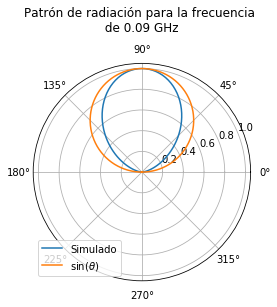

time: 282 ms (started: 2022-09-07 20:39:57 -03:00)


In [36]:
theta_nom, gain_nom = get_polar_gain('nominal.csv')
plot_reference(theta_nom, gain_nom, '0.09')

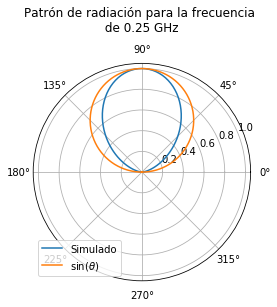

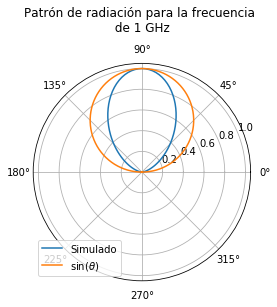

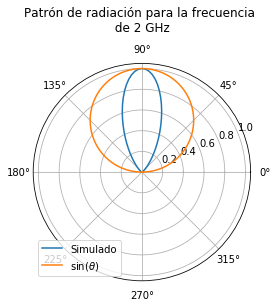

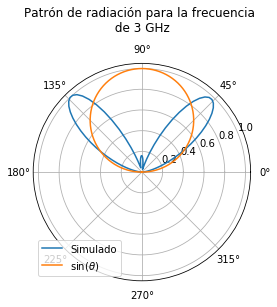

time: 735 ms (started: 2022-09-07 19:01:14 -03:00)


In [32]:
theta_025ghz, gain_025ghz = get_polar_gain('0-25ghz.csv')
theta_1ghz, gain_1ghz = get_polar_gain('1ghz.csv')
theta_2ghz, gain_2ghz = get_polar_gain('2ghz.csv')
theta_3ghz, gain_3ghz = get_polar_gain('3ghz.csv')

plot_reference(theta_025ghz, gain_025ghz, '0.25')
plot_reference(theta_1ghz, gain_1ghz, '1')
plot_reference(theta_2ghz, gain_2ghz, '2')
plot_reference(theta_3ghz, gain_3ghz, '3')

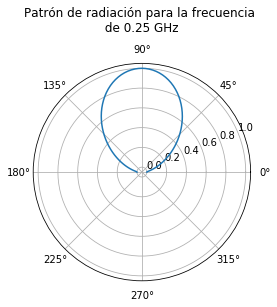

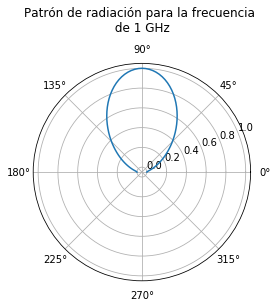

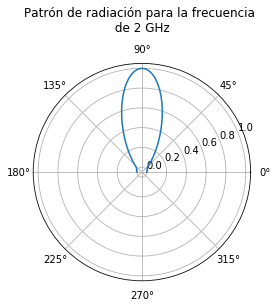

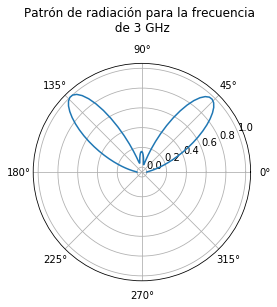

time: 860 ms (started: 2022-09-07 19:01:16 -03:00)


In [33]:
plot_polar_radiation(theta_025ghz, gain_025ghz, '0.25')
plot_polar_radiation(theta_1ghz, gain_1ghz, '1')
plot_polar_radiation(theta_2ghz, gain_2ghz, '2')
plot_polar_radiation(theta_3ghz, gain_3ghz, '3')

In [ ]:
def get_3d_polar_gain(file_name):
  with open(file_name) as file:
    csvreader = csv.reader(file)
    phi, theta, gain = [], [], []
    next(csvreader)
    for row in csvreader:
      phi.append(np.pi * int(row[0]) / 180)
      theta.append(np.pi * int(row[1]) / 180)
      gain.append(float(row[2]))
    
  return phi, theta, gain

time: 2.43 ms (started: 2022-09-07 04:03:49 +00:00)


In [ ]:
def plot_3d_radiation(phi, theta, gain, frec):
  THETA, PHI = np.meshgrid(theta, phi)
  X = gain * np.sin(THETA) * np.cos(PHI)
  Y = gain * np.sin(THETA) * np.sin(PHI)
  Z = gain * np.cos(THETA)
  GAIN = gain * np.ones(np.shape(X))

  fig = plt.figure()
  ax = plt.axes(projection='3d')
  ax.plot_surface(X, Y, Z, rstride=5, cstride=5, cmap='viridis', linewidth=0)
  #facecolors = cm.coolwarm(GAIN)

  
  ax.set_title('surface');
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z');

time: 6.13 ms (started: 2022-09-07 04:03:49 +00:00)


In [ ]:
def subsample(array):
  result = []
  for i in  range(len(array)):
    if i % 20 == 0:
      result.append(array[i])

  return result 

time: 1.22 ms (started: 2022-09-07 04:03:49 +00:00)


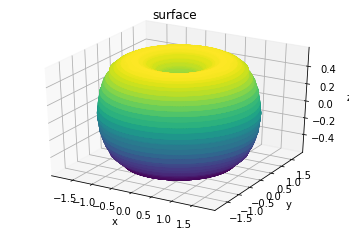

time: 6.41 s (started: 2022-09-07 04:03:49 +00:00)


In [ ]:
phi_1ghz_3d, theta_1ghz_3d , gain_1ghz_3d = get_3d_polar_gain('3d_gain_plot_1ghz.csv')
plot_3d_radiation(subsample(phi_1ghz_3d), subsample(theta_1ghz_3d), subsample(gain_1ghz_3d), '1')

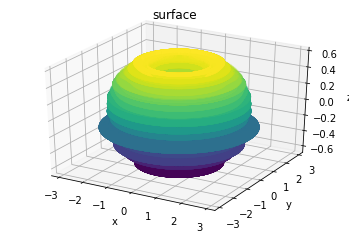

time: 8.48 s (started: 2022-09-07 04:03:55 +00:00)


In [ ]:
phi_2ghz_3d, theta_2ghz_3d , gain_2ghz_3d = get_3d_polar_gain('3d_gain_plot_2ghz.csv')
plot_3d_radiation(subsample(phi_2ghz_3d), subsample(theta_2ghz_3d), subsample(gain_2ghz_3d), '1')

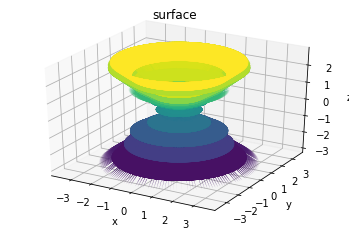

time: 4.44 s (started: 2022-09-07 04:04:04 +00:00)


In [ ]:
phi_3ghz_3d, theta_3ghz_3d , gain_3ghz_3d = get_3d_polar_gain('3d_gain_plot_3ghz.csv')
plot_3d_radiation(subsample(phi_3ghz_3d), subsample(theta_3ghz_3d), subsample(gain_3ghz_3d), '1')

In [ ]:
mu = 4 *np.pi *10**-7

time: 980 µs (started: 2022-09-07 04:18:03 +00:00)


### Parte c

In [40]:
def get_reflection(file_name):
  with open(file_name) as file:
    csvreader = csv.reader(file)
    freq, refl = [], []
    next(csvreader)
    for row in csvreader:
      freq.append(float(row[0]))
      refl.append(float(row[1]))
    
  return freq, refl

time: 0 ns (started: 2022-09-07 21:24:51 -03:00)


In [55]:
def get_band_width(freq, refl):
    entrar = False
    salir = False
    min_refl = 0
    opt_frec = None
    for f, r in zip(freq, refl):
        if r < min_refl:
            min_refl = r
            opt_frec = f
        
        if not salir:
            if not entrar and r < -10:
                entrar = True
                a = f

            if entrar and r > -10:
                salir = True
                b = f

    return opt_frec, min_refl, [a,b]

time: 0 ns (started: 2022-09-07 21:37:14 -03:00)


In [56]:
freq_1, refl_1 = get_reflection('S_1.csv')

time: 0 ns (started: 2022-09-07 21:37:14 -03:00)


In [57]:
get_band_width(freq_1, refl_1)

(0.952, -17.0079630610092, [0.908, 1.0])

time: 16 ms (started: 2022-09-07 21:37:15 -03:00)
